Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Galton's data on heights of parents and their adult children
galton = pd.read_csv("C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/galton.csv")
heights = pd.DataFrame({
    'MidParent': galton['midparentHeight'],
    'Child': galton['childHeight']
})

In [3]:
heights

,MidParent,Child
0,75.43,73.2
1,75.43,69.2
2,75.43,69.0
3,75.43,69.0
4,73.66,73.5
...,...,...
929,66.64,64.0
930,66.64,62.0
931,66.64,61.0
932,65.27,66.5


Text(0, 0.5, 'Child')

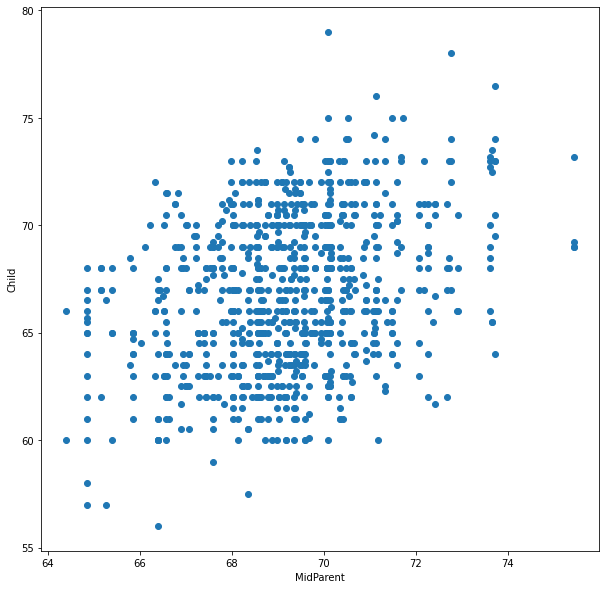

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(heights.MidParent, heights.Child)
plt.xlabel("MidParent")
plt.ylabel("Child")


In [5]:
 def predict_child(mpht):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    
    close_points = heights[np.logical_and(heights['MidParent']>mpht-0.5,heights['MidParent']< mpht + 0.5)]
    return close_points['Child'].mean()                       

In [6]:
predict_child(65)

64.22962962962963

In [7]:
# Apply predict_child to all the midparent heights

heights_with_predictions=pd.DataFrame({'Prediction': heights['MidParent'].apply(predict_child)})
    
#heights['MidParent']
heights_with_predictions

,Prediction
0,70.100000
1,70.100000
2,70.100000
3,70.100000
4,70.415789
...,...
929,65.156579
930,65.156579
931,65.156579
932,64.229630


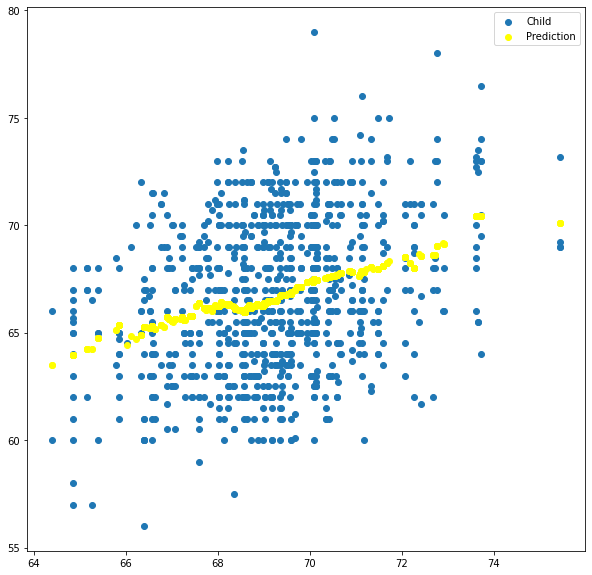

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(heights.MidParent, heights.Child)
plt.scatter(heights.MidParent,heights_with_predictions.Prediction,color='yellow')
plt.legend(["Child","Prediction"])

Correlation 

In [9]:
hybrid = pd.read_csv("C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/hybrid.csv")
hybrid

,vehicle,year,msrp,acceleration,mpg,class
0,Prius (1st Gen),1997,24509.74,7.46,41.26,Compact
1,Tino,2000,35354.97,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26832.25,7.97,45.23,Compact
3,Insight,2000,18936.41,9.52,53.00,Two Seater
4,Civic (1st Gen),2001,25833.38,7.04,47.04,Compact
...,...,...,...,...,...,...
148,S400,2013,92350.00,13.89,21.00,Large
149,Prius Plug-in,2013,32000.00,9.17,50.00,Midsize
150,C-Max Energi Plug-in,2013,32950.00,11.76,43.00,Midsize
151,Fusion Energi Plug-in,2013,38700.00,11.76,43.00,Midsize


Text(0, 0.5, 'msrp')

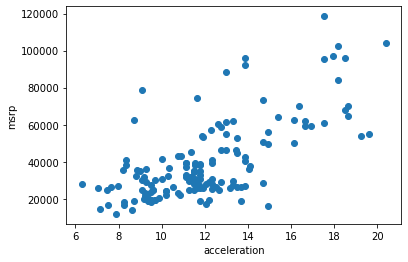

In [10]:
plt.scatter(hybrid.acceleration, hybrid.msrp)
plt.xlabel("acceleration")
plt.ylabel("msrp")

Text(0, 0.5, 'msrp')

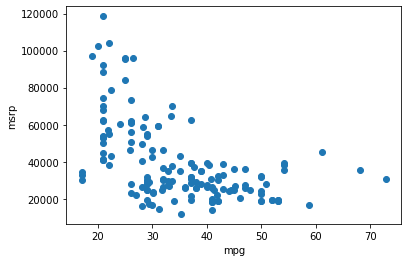

In [11]:
plt.scatter(hybrid.mpg, hybrid.msrp)
plt.xlabel("mpg")
plt.ylabel("msrp")

Text(0, 0.5, 'msrp')

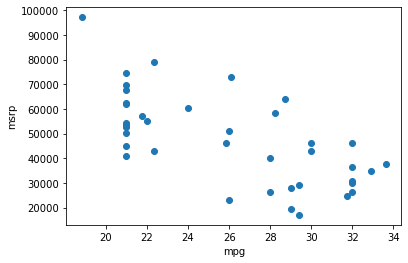

In [12]:
suv = hybrid[hybrid['class']== 'SUV']
plt.scatter(suv.mpg, suv.msrp)
plt.xlabel("mpg")
plt.ylabel("msrp")


Text(0, 0.5, 'msrp')

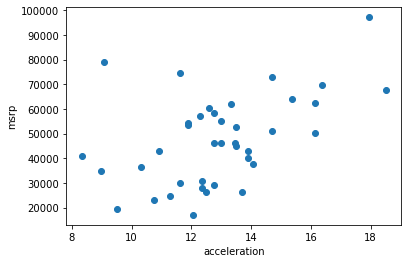

In [13]:
plt.scatter(suv.acceleration, suv.msrp)
plt.xlabel("acceleration")
plt.ylabel("msrp")


In [14]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

(-3.0, 3.0)

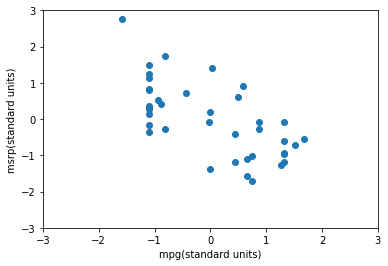

In [15]:
New=pd.DataFrame({
    'mpg (standard units)':standard_units(suv.mpg), 
    'msrp (standard units)': standard_units(suv.msrp)
})
plt.scatter(New['mpg (standard units)'], New['msrp (standard units)'])
plt.xlabel("mpg(standard units)")
plt.ylabel("msrp(standard units)")

plt.xlim(-3, 3)
plt.ylim(-3, 3)

(-3.0, 3.0)

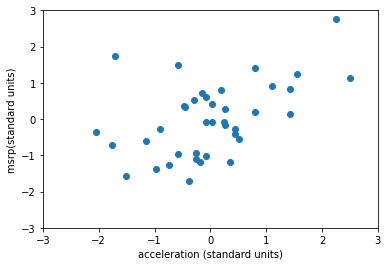

In [16]:
New1=pd.DataFrame({
    'acceleration (standard units)':standard_units(suv.acceleration), 
    'msrp (standard units)': standard_units(suv.msrp)
})
plt.scatter(New1['acceleration (standard units)'], New1['msrp (standard units)'])
plt.xlabel("acceleration (standard units)")
plt.ylabel("msrp(standard units)")

plt.xlim(-3, 3)
plt.ylim(-3, 3)

In [17]:
def r_scatter(r):
    plt.figure(figsize=(10,10))
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

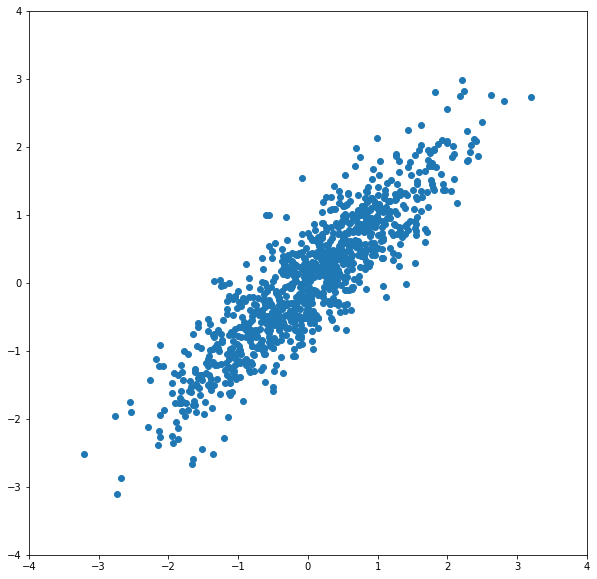

In [18]:
r_scatter(0.9)

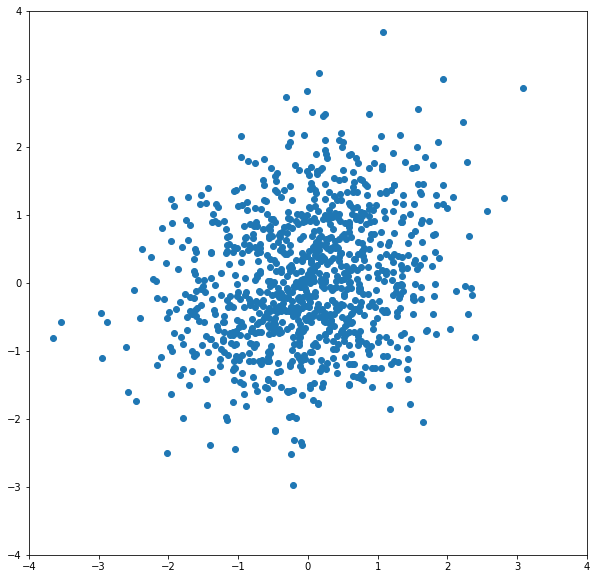

In [19]:
r_scatter(0.25)

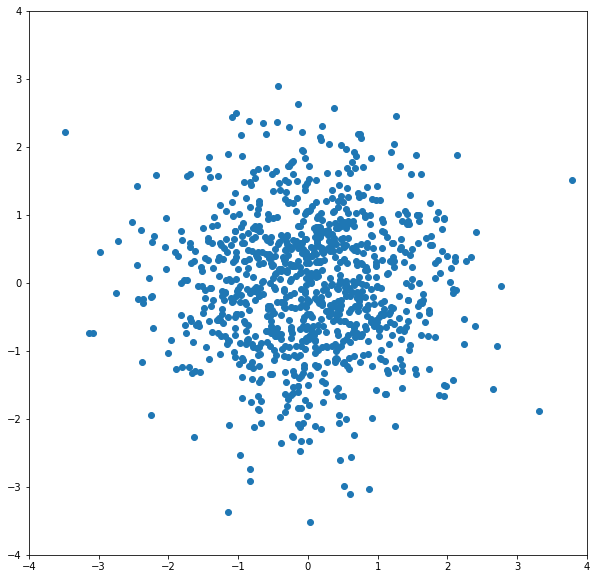

In [20]:
r_scatter(0)

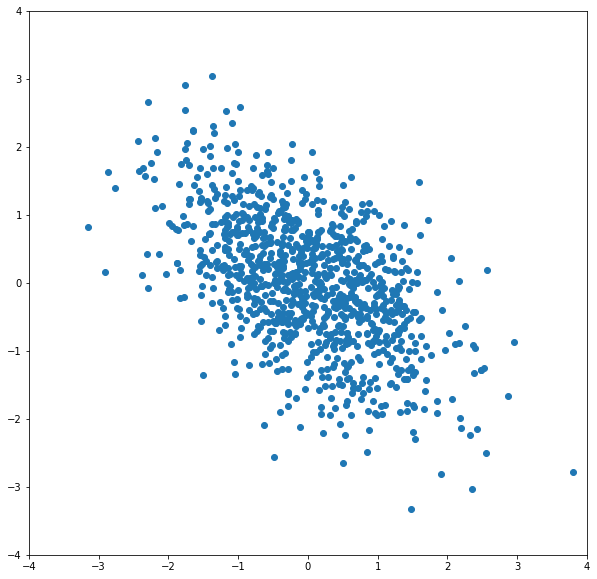

In [21]:
r_scatter(-0.55)

In [22]:
x = np.arange(1, 7, 1)
y = [2, 3, 1, 5, 2, 7]
t = pd.DataFrame({
        'x': x,
        'y': y
})
t

,x,y
0,1,2
1,2,3
2,3,1
3,4,5
4,5,2
5,6,7


Text(0, 0.5, 'y')

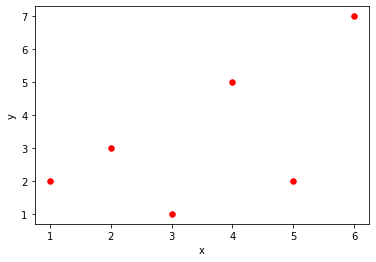

In [23]:
plt.scatter(t.x,t.y,s=30,color='red')
plt.xlabel('x')
plt.ylabel('y')

In [24]:
t['x (standard units)']= standard_units(x)
t['y (standard units)']= standard_units(y)
        
t_su=t
t_su

,x,y,x (standard units),y (standard units)
0,1,2,-1.46385,-0.648886
1,2,3,-0.87831,-0.162221
2,3,1,-0.29277,-1.135550
3,4,5,0.29277,0.811107
4,5,2,0.87831,-0.648886
5,6,7,1.46385,1.784436


In [25]:
t['product of standard units']= t_su['x (standard units)'] * t_su['y (standard units)']
t_product=t
t_product

,x,y,x (standard units),y (standard units),product of standard units
0,1,2,-1.46385,-0.648886,0.949871
1,2,3,-0.87831,-0.162221,0.142481
2,3,1,-0.29277,-1.135550,0.332455
3,4,5,0.29277,0.811107,0.237468
4,5,2,0.87831,-0.648886,-0.569923
5,6,7,1.46385,1.784436,2.612146


In [26]:
# r is the average of the products of standard units

r = np.mean(t_product['product of standard units'])
r

0.6174163971897709

Properties of  r 

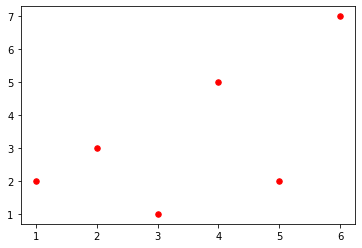

In [32]:
plt.scatter(t_product['x'],t_product['y'],s=30,color='red')

In [39]:
def correlation(t, x, y):
    return np.mean(standard_units(t[x])*standard_units(t[y]))

In [40]:
correlation(t, 'x', 'y')

0.6174163971897709

In [41]:
correlation(t, 'y', 'x')

0.6174163971897709

In [42]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [43]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

Correlation Measures Linear Association

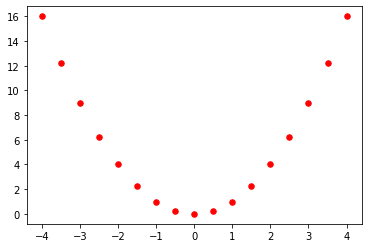

In [45]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = pd.DataFrame({
        'x': new_x,
        'y': new_x**2
})
plt.scatter(nonlinear['x'], nonlinear['y'], s=30, color='r')

In [46]:
correlation(nonlinear, 'x', 'y')

0.0

Correlation is Affected by Outliers

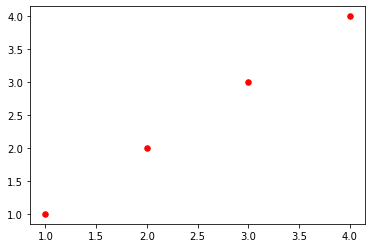

In [48]:
line = pd.DataFrame({
        'x':[1, 2, 3, 4],
        'y':[1, 2, 3, 4]
})
plt.scatter(line['x'], line['y'], s=30, color='r')

In [49]:
correlation(line, 'x', 'y')

1.0

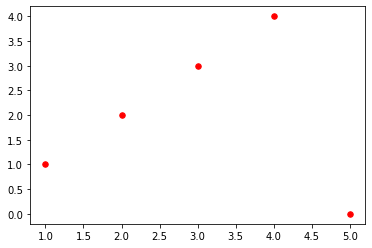

In [51]:
outlier = pd.DataFrame({
        'x':[1, 2, 3, 4,5],
        'y':[1, 2, 3, 4,0]
})
plt.scatter(outlier['x'], outlier['y'], s=30, color='r')

In [52]:
correlation(outlier, 'x', 'y')

0.0

Ecological Correlations Should be Interpreted with Care 

In [53]:
sat2014=pd.read_csv("C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/sat2014.csv")
sat2014

,State,Participation Rate,Critical Reading,Math,Writing,Combined
0,North Dakota,2.3,612,620,584,1816
1,Illinois,4.6,599,616,587,1802
2,Iowa,3.1,605,611,578,1794
3,South Dakota,2.9,604,609,579,1792
4,Minnesota,5.9,598,610,578,1786
5,Michigan,3.8,593,610,581,1784
6,Wisconsin,3.9,596,608,578,1782
7,Missouri,4.2,595,597,579,1771
8,Wyoming,3.3,590,599,573,1762
9,Kansas,5.3,591,596,566,1753


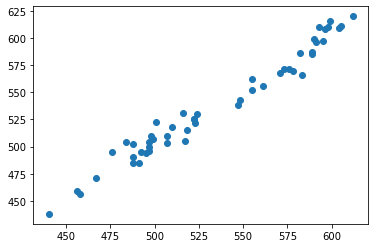

In [54]:
plt.scatter(sat2014['Critical Reading'], sat2014['Math'])

In [55]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067433

The Regression Line

In [57]:
galton=pd.read_csv("C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/galton.csv")
heights = pd.DataFrame({
    'MidParent': galton['midparentHeight'],
    'Child': galton['childHeight']
})
heights

,MidParent,Child
0,75.43,73.2
1,75.43,69.2
2,75.43,69.0
3,75.43,69.0
4,73.66,73.5
...,...,...
929,66.64,64.0
930,66.64,62.0
931,66.64,61.0
932,65.27,66.5


In [59]:
def predict_child(mpht):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    
    close_points = heights[np.logical_and(heights['MidParent']>mpht-0.5, heights['MidParent']< mpht + 0.5)]
    return close_points['Child'].mean()   

In [66]:
heights['Prediction']= heights['MidParent'].apply(predict_child)
#heights_with_predictions=pd.DataFrame({'Prediction': heights['MidParent'].apply(predict_child)})
heights_with_predictions = heights
heights_with_predictions

,MidParent,Child,Prediction
0,75.43,73.2,70.100000
1,75.43,69.2,70.100000
2,75.43,69.0,70.100000
3,75.43,69.0,70.100000
4,73.66,73.5,70.415789
...,...,...,...
929,66.64,64.0,65.156579
930,66.64,62.0,65.156579
931,66.64,61.0,65.156579
932,65.27,66.5,64.229630


Text(0.5, 0, 'MidParent')

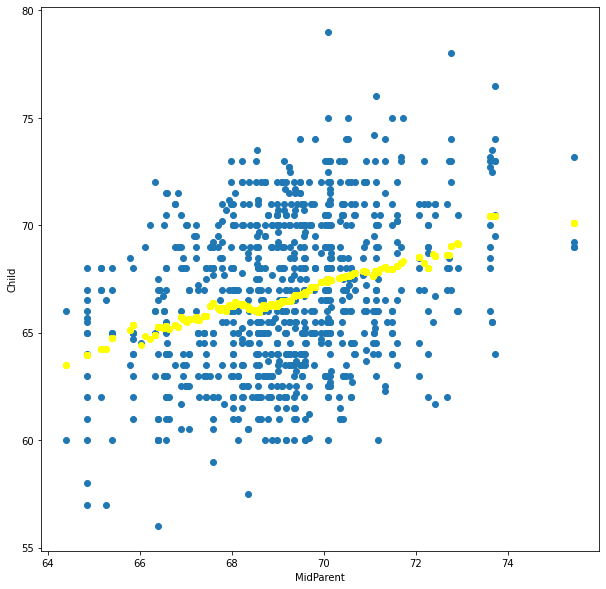

In [75]:
plt.figure(figsize=(10,10))
plt.scatter(heights_with_predictions['MidParent'],heights_with_predictions['Child'])
plt.scatter(heights_with_predictions['MidParent'],heights_with_predictions['Prediction'],color='yellow')
plt.ylabel('Child')
plt.xlabel('MidParent')


Measuring in Standard Units

In [76]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz) 

In [77]:
heights_SU = pd.DataFrame({
    'MidParent SU': standard_units(heights['MidParent']),
    'Child SU': standard_units(heights['Child'])})
heights_SU

,MidParent SU,Child SU
0,3.454652,1.804156
1,3.454652,0.686005
2,3.454652,0.630097
3,3.454652,0.630097
4,2.472085,1.888017
...,...,...
929,-1.424873,-0.767591
930,-1.424873,-1.326667
931,-1.424873,-1.606205
932,-2.185390,-0.068747


In [78]:
sd_midparent = np.std(heights['MidParent'])
sd_midparent

1.8014050969207571

In [79]:
sd_midparent_su = np.std(heights_SU['MidParent SU'])
sd_midparent_su

1.0

In [80]:
0.5/sd_midparent

0.277561110965367

In [81]:
def predict_child_su(mpht_su):
    """Return a prediction of the height (in standard units) of a child 
    whose parents have a midparent height of mpht_su in standard units.
    """
    close = 0.5/sd_midparent
    close_points = heights_SU[((mpht_su-close) <= heights_SU['MidParent SU']) & ( heights_SU['MidParent SU'] <= (mpht_su + close))]    
    return close_points['Child SU'].mean()   

In [82]:
heights_with_su_predictions = heights_SU.copy()
heights_with_su_predictions['Prediction SU'] = [predict_child_su(heights_SU['MidParent SU'][i]) for i in range(len(heights_SU))]

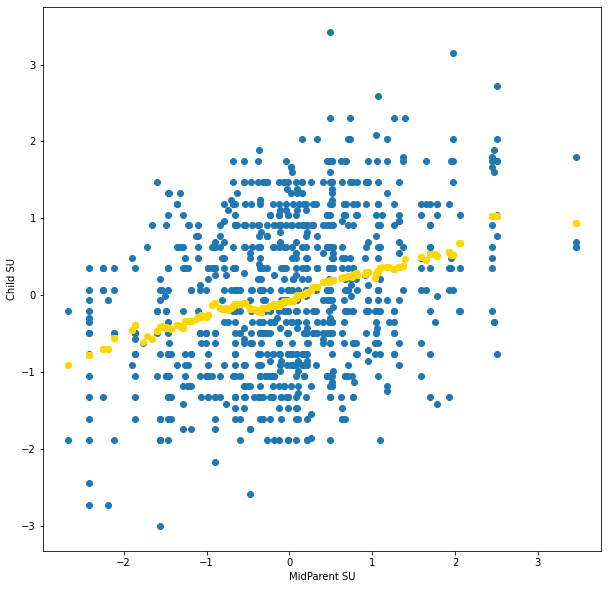

In [86]:

plt.figure(figsize=(10,10))
plt.scatter(heights_with_su_predictions['MidParent SU'], heights_with_su_predictions['Child SU'], label = 'Child SU')
plt.scatter(heights_with_su_predictions['MidParent SU'], heights_with_su_predictions['Prediction SU'], color = 'gold', label = 'Prediction SU')
plt.ylabel('Child SU')
plt.xlabel('MidParent SU')
plt.show()

Identifying the Line in Standard Units 

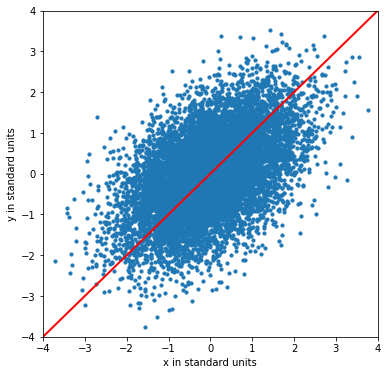

In [87]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo
plt.figure(figsize=(6,6))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.scatter(x_demo, y_demo, s=10)
#plt.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
plt.plot([-4,4],[-4,4], color='r', lw=2)
#plt.plot([1.5,1.5], [-4,4], color='k', lw=2)
plt.xlabel('x in standard units')
plt.ylabel('y in standard units')
plt.show()

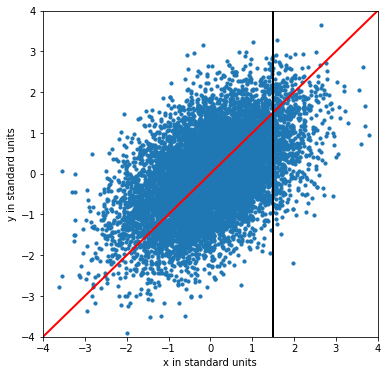

In [88]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo
plt.figure(figsize=(6,6))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.scatter(x_demo, y_demo, s=10)
#plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
plt.plot([-4,4],[-4,4], color='r', lw=2)
plt.plot([1.5,1.5], [-4,4], color='k', lw=2)
plt.xlabel('x in standard units')
plt.ylabel('y in standard units');
plt.show()

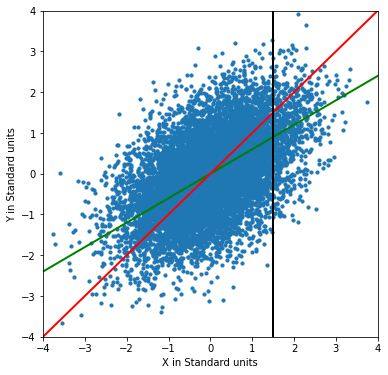

In [90]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo
plt.figure(figsize=(6,6))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.scatter(x_demo, y_demo, s=10)
plt.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
plt.plot([-4,4],[-4,4], color='r', lw=2)
plt.plot([1.5,1.5], [-4,4], color='k', lw=2)
plt.xlabel('X in Standard units')
plt.ylabel('Y in Standard units')
plt.show()

The Regression Line, in Standard Units 

In [92]:
def regression_line(r):
    x = np.random.normal(0, 1, 10000)
    z = np.random.normal(0, 1, 10000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.figure(figsize=(6, 6))
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.scatter(x, y)
    
    plt.plot([-4, 4], [-4*r,4*r], color='g', lw=2)
    if r >= 0:
        plt.plot([-4,4],[-4,4], lw=2, color='r')
    else:
        plt.plot([-4,4], [4,-4], lw=2, color='r')
    plt.show()

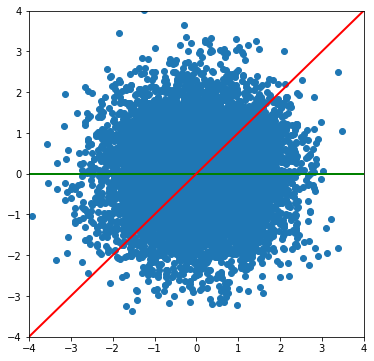

In [93]:
regression_line(0)

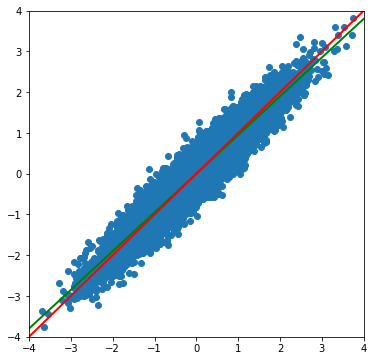

In [94]:
regression_line(0.95)

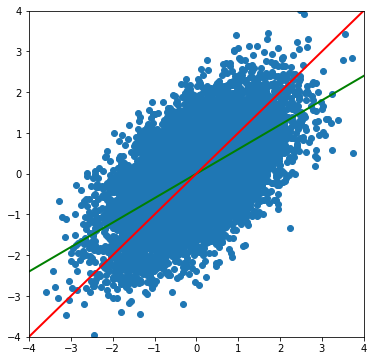

In [95]:
regression_line(0.6)

The Regression Effect

In [96]:
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t[label_x])*standard_units(t[label_y]))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t[label_y])/np.std(t[label_x])

def intercept(t, label_x, label_y):
    return np.mean(t[label_y]) - slope(t, label_x, label_y)*np.mean(t[label_x])

In [97]:
galton_r = correlation(heights, 'MidParent', 'Child')
galton_r

0.32094989606395924

In [98]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(0.637360896969479, 22.63624054958975)

In [99]:
galton_slope*70.48 + galton_intercept

67.55743656799862

In [100]:
heights_with_predictions[heights_with_predictions['MidParent'] == 70.48].head(3)

,MidParent,Child,Prediction
33,70.48,74.0,67.634239
34,70.48,70.0,67.634239
35,70.48,68.0,67.634239


In [101]:
heights_with_predictions['Regression Prediction'] = [galton_slope*heights['MidParent'][i] + galton_intercept for i in range(len(heights))]
heights_with_predictions

,MidParent,Child,Prediction,Regression Prediction
0,75.43,73.2,70.100000,70.712373
1,75.43,69.2,70.100000,70.712373
2,75.43,69.0,70.100000,70.712373
3,75.43,69.0,70.100000,70.712373
4,73.66,73.5,70.415789,69.584244
...,...,...,...,...
929,66.64,64.0,65.156579,65.109971
930,66.64,62.0,65.156579,65.109971
931,66.64,61.0,65.156579,65.109971
932,65.27,66.5,64.229630,64.236786


Text(0.5, 0, 'Midparent')

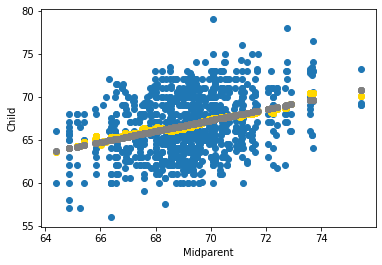

In [102]:
plt.scatter(heights_with_predictions['MidParent'], heights_with_predictions['Child'], label = 'Child')
plt.scatter(heights_with_predictions['MidParent'], heights_with_predictions['Prediction'], color = 'gold', label = 'Prediction')
plt.scatter(heights_with_predictions['MidParent'], heights_with_predictions['Regression Prediction'], color = 'grey', label = 'Prediction')
plt.ylabel('Child')
plt.xlabel('Midparent')

Fitted Values

In [103]:
def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table[x] + b

In [104]:
heights['Fitted'] =  fit(heights, 'MidParent', 'Child')
heights.head()

,MidParent,Child,Prediction,Regression Prediction,Fitted
0,75.43,73.2,70.100000,70.712373,70.712373
1,75.43,69.2,70.100000,70.712373,70.712373
2,75.43,69.0,70.100000,70.712373,70.712373
3,75.43,69.0,70.100000,70.712373,70.712373
4,73.66,73.5,70.415789,69.584244,69.584244


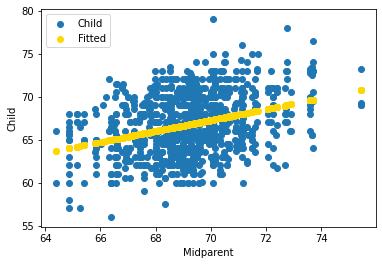

In [105]:
plt.scatter(heights['MidParent'], heights['Child'], label= 'Child')
plt.scatter(heights['MidParent'], heights['Fitted'], label = 'Fitted', color = 'gold')
plt.ylabel('Child')
plt.xlabel('Midparent')
plt.legend(loc = 'upper left')
plt.show()

C:\Users\ashme\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MidParent', ylabel='Child'>

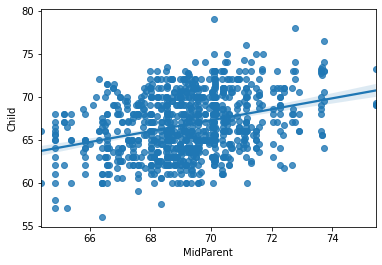

In [106]:
import seaborn as sns
sns.regplot(heights['MidParent'], heights['Child'], fit_reg=True)

Units of Measurement of the Slope

In [110]:
baby = pd.read_csv("C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/baby.csv")

C:\Users\ashme\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Maternal Height', ylabel='Maternal Pregnancy Weight'>

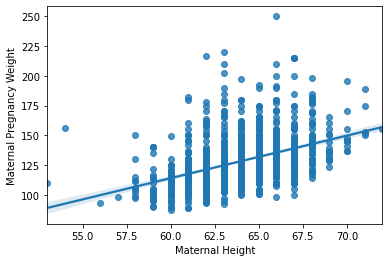

In [111]:
sns.regplot(baby['Maternal Height'], baby['Maternal Pregnancy Weight'], fit_reg=True)

In [112]:
slope(baby, 'Maternal Height', 'Maternal Pregnancy Weight')

3.572846259275056